# Session 9 B7 SAKA
# Relationships Between Variables

**Outline:**
1. Load Data
2. Correlation Analysis
  * Pearson's Correlation
  * Spearman's Rank
  * Kendall Tau
3. Scatter Plot
4. Nonlinear Relationships
  * Locally Weighted Scatterplot Smoothing


## 1. Load Data

ChatGPT Prompt:

Berikan kode python untuk menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ChatGPT Prompt:

Berikan kode python untuk membaca 5 data pertama pada dataset file "Chiller.xlsx" disimpan dengan nama dataframe 'data', sesuaikan path filenya

In [3]:
import pandas as pd

# Ganti path file sesuai dengan lokasi file "Chiller.xlsx" pada komputer Anda.
file_path = '/content/drive/MyDrive/Dataset/Chiller.xlsx'

# Membaca file Excel dan menyimpannya dalam DataFrame 'data'
data = pd.read_excel(file_path)

# Menampilkan 5 data pertama
data.head()


,Evap LWT,Evap EWT,Unit Capacity,Evap Sat Temperature,Cond Sat Temperature,Suction Temperature,Discharge Temperature,Oil Pressure,Run Hour Kompressor,Ampere Kompressor,"No, Of Start",Tekanan Return Chiller,Tekanan Supply Chiller,Inlet Softwater,Tekanan Sebelum Pompa,Tekanan Sesudah Pompa,Ampere R-S,Ampere S-T
0,5.8,9.7,44.0,1.6,44.9,6.6,63.6,1007.2,17924,133.6,1336,5.0,4.6,3.0,4.6,6.4,143.0,146.2
1,5.8,9.8,46.0,1.4,44.9,6.6,63.9,1007.2,17926,134.5,1336,5.0,4.6,3.0,4.6,6.4,121.0,116.2
2,5.8,9.8,46.0,2.3,44.2,7.6,62.5,976.4,17927,132.7,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5
3,6.1,10.4,46.0,2.3,40.4,6.8,60.6,844.0,17930,120.4,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5
4,5.8,9.9,48.0,2.0,39.8,7.0,59.3,968.5,17931,118.5,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5


ChatGPT Prompt:

Berikan kode python untuk menampilkan info dari data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evap LWT                1219 non-null   float64
 1   Evap EWT                1219 non-null   float64
 2   Unit Capacity           1219 non-null   float64
 3   Evap Sat Temperature    1219 non-null   float64
 4   Cond Sat Temperature    1219 non-null   float64
 5   Suction Temperature     1219 non-null   float64
 6   Discharge Temperature   1219 non-null   float64
 7   Oil Pressure            1219 non-null   float64
 8   Run Hour Kompressor     1219 non-null   int64  
 9   Ampere Kompressor       1219 non-null   float64
 10  No, Of Start            1219 non-null   int64  
 11  Tekanan Return Chiller  1219 non-null   float64
 12  Tekanan Supply Chiller  1219 non-null   float64
 13  Inlet Softwater         1219 non-null   float64
 14  Tekanan Sebelum Pompa   1219 non-null   

## 2. Correlation Analysis

### 2.1. Pearson's Correlation
ChatGPT Prompt:


Lanjutkan kode untuk menampilkan Correlation Analysis pada data dengan menggunakan visualisasi heatmap

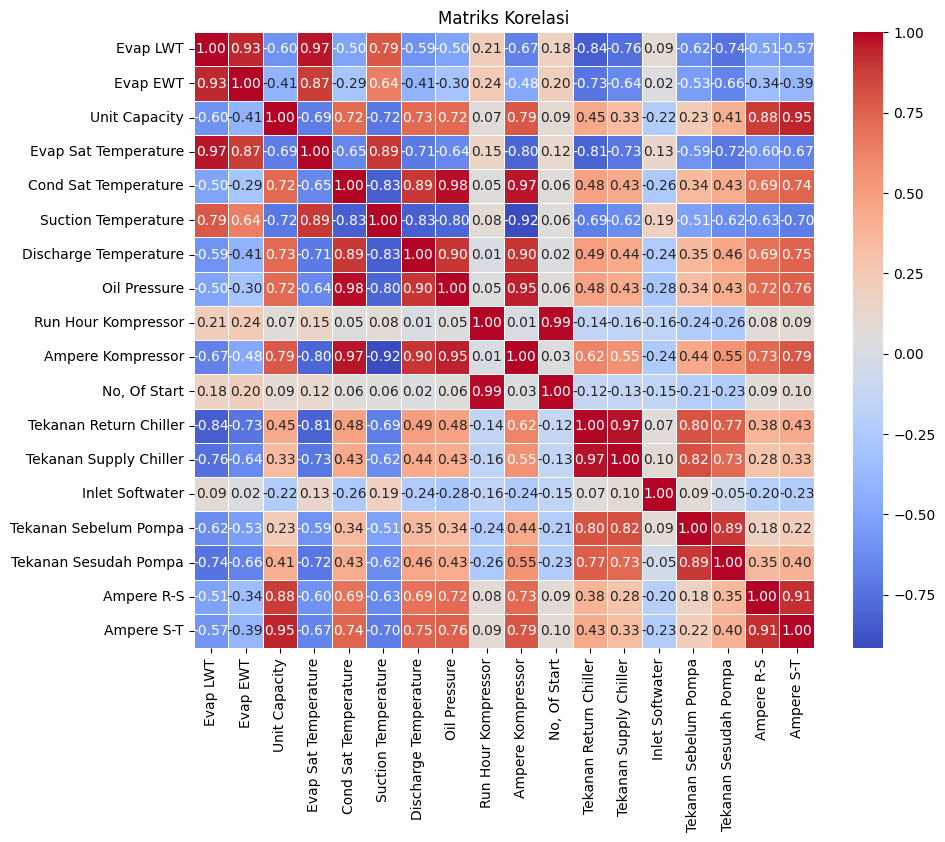

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan analisis korelasi
correlation_matrix = data.corr()

# Menampilkan matriks korelasi dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

Dalam fungsi corr() dariLibrary Pandas, yang digunakan adalah korelasi Pearson. Korelasi Pearson adalah metode korelasi yang mengukur hubungan linier antara dua variabel. Nilai korelasi Pearson (r) berkisar antara -1 hingga 1, di mana:

* r = 1 menunjukkan hubungan positif sempurna (korelasi positif sempurna).
* r = -1 menunjukkan hubungan negatif sempurna (korelasi negatif sempurna).
* r = 0 menunjukkan tidak ada hubungan linier antara dua variabel.


Gambar matriks korelasi di atas menunjukkan hubungan antara 13 variabel numerik yang diukur dari sebuah chiller.

Nilai korelasi antara dua variabel diwakili oleh angka di dalam sel matriks. Angka tersebut dapat berkisar antara -1 hingga 1. Angka positif menunjukkan korelasi positif, sedangkan angka negatif menunjukkan korelasi negatif. Semakin mendekati 1, semakin kuat korelasi antara dua variabel. Semakin mendekati -1, semakin kuat korelasi negatif antara dua variabel.

Berdasarkan matriks korelasi di atas, dapat disimpulkan bahwa:

**1. Variabel-variabel yang paling berkorelasi kuat adalah:**

  * Evap LWT dan Evap EWT (korelasi positif sebesar 0,93)
  * Unit Capacity dan Evap Sat Temperature (korelasi positif sebesar 0,79)
  * Oil Pressure dan Run Hour Kompresor (korelasi positif sebesar 0,79)
  * Tekanan Return Chiller dan Tekanan Supply Chiller (korelasi positif sebesar 0,97)

**2. Variabel-variabel yang paling berkorelasi negatif adalah:**
  * Evap LWT dan Discharge Temperature (korelasi negatif sebesar 0,79)
  * Unit Capacity dan Discharge Temperature (korelasi negatif sebesar 0,59)
  * Oil Pressure dan Discharge Temperature (korelasi negatif sebesar 0,50)

**3. Variabel-variabel yang tidak berkorelasi signifikan adalah:**
  * Inlet Softwater dan Tekanan Return Chiller (korelasi sebesar 0,09)
  * Inlet Softwater dan Tekanan Supply Chiller (korelasi sebesar 0,09)
  * Tekanan Sebelum Pompa dan Tekanan Sesudah Pompa (korelasi sebesar 0,00)
  * Ampere R-S dan Ampere S-T (korelasi sebesar 0,09)

Informasi dari matriks korelasi ini dapat digunakan untuk memahami hubungan antara variabel-variabel yang diukur dari chiller. Misalnya, korelasi positif yang kuat antara Evap LWT dan Evap EWT menunjukkan bahwa kedua variabel tersebut cenderung berubah secara bersamaan. Hal ini dapat berarti bahwa perubahan pada suhu kondensor evaporator akan menyebabkan perubahan pada suhu evaporasi evaporator.

Korelasi negatif yang kuat antara Evap LWT dan Discharge Temperature menunjukkan bahwa kedua variabel tersebut cenderung bergerak berlawanan arah. Hal ini dapat berarti bahwa peningkatan suhu kondensor evaporator akan menyebabkan penurunan suhu evaporasi evaporator.

Korelasi yang tidak signifikan menunjukkan bahwa tidak ada hubungan yang kuat antara dua variabel. Hal ini dapat berarti bahwa perubahan pada satu variabel tidak akan menyebabkan perubahan yang signifikan pada variabel lainnya.

### 2.2. Spearman's Rank

ChatGPT Prompt:

Berikan kode untuk menampilkan Correlation Analysis menggunakan Spearman Rank pada data dengan visualisasi heatmap menggunakan tema warna cmap yang berbeda dari matriks korelasi pearson sebelumnya

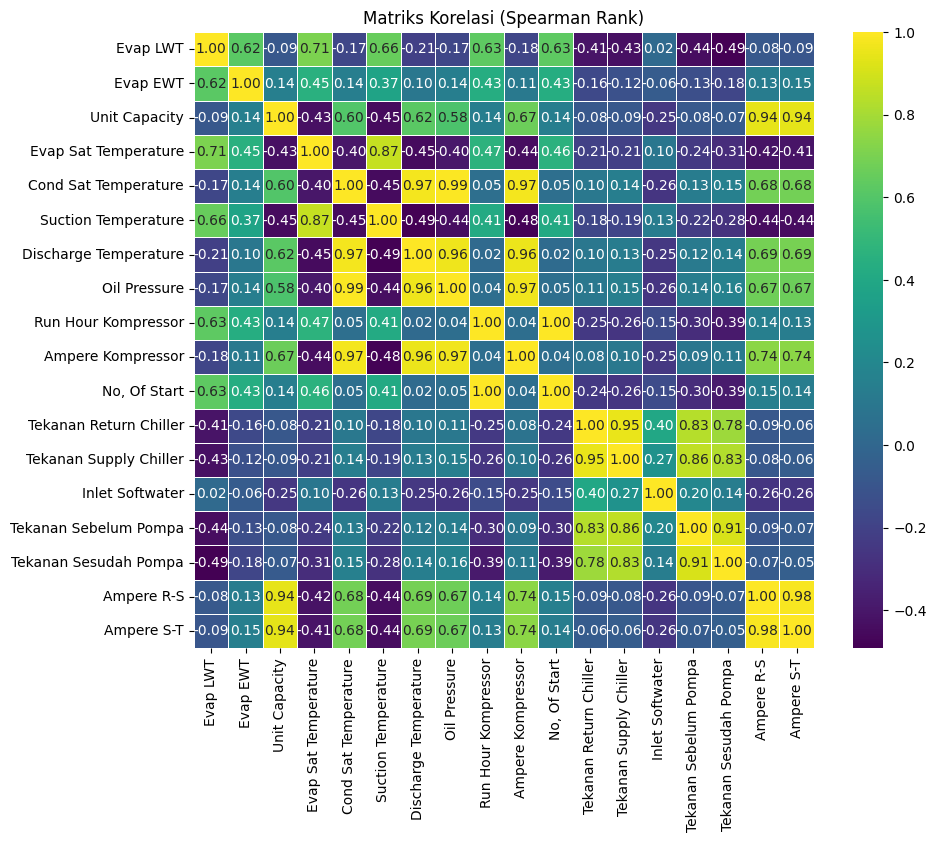

In [17]:
# Melakukan analisis korelasi dengan metode Spearman Rank
correlation_matrix_spearman = data.corr(method='spearman')

# Menampilkan matriks korelasi dalam bentuk heatmap dengan cmap yang berbeda
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi (Spearman Rank)')
plt.show()

### 2.3. Kendall Tau

ChatGPT Prompt:

Berikan kode untuk menampilkan Correlation Analysis menggunakan Kendall Tau pada data dengan visualisasi heatmap menggunakan tema warna cmap yang berbeda dari matriks korelasi pearson dan spearman sebelumnya

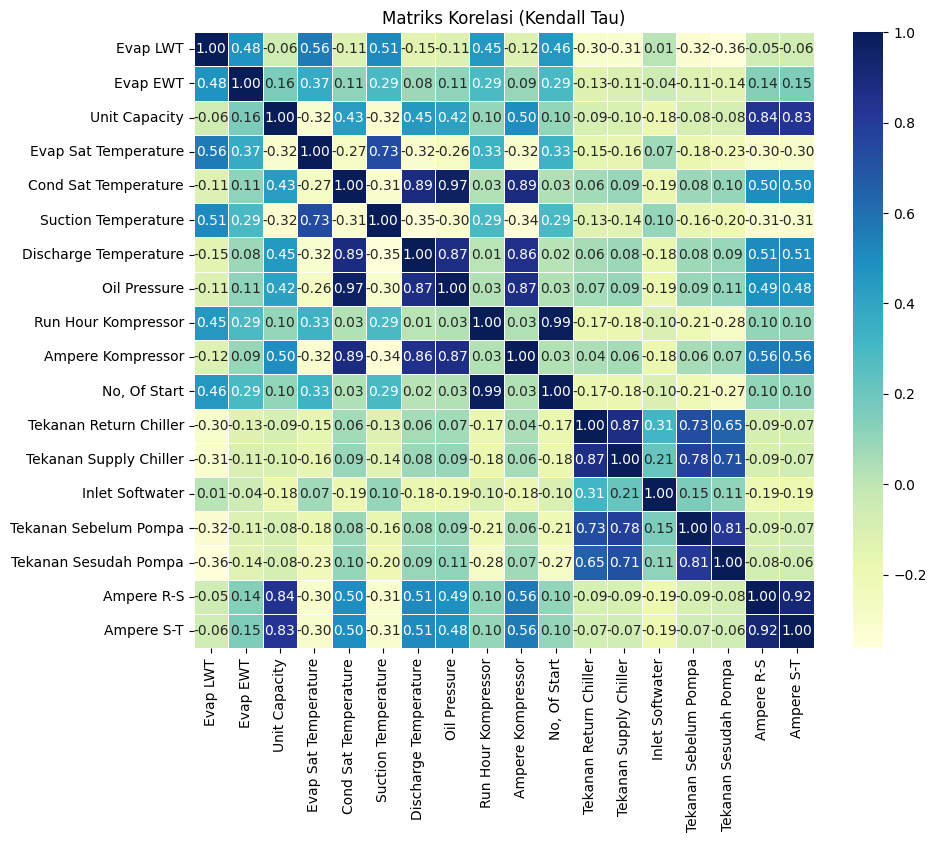

In [20]:

# Menghitung matriks korelasi menggunakan metode Kendall Tau
kendall_corr = data.corr(method='kendall')

# Membuat heatmap dengan tema warna yang berbeda
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi (Kendall Tau)')
plt.show()


## 3. Scatter Plot

ChatGPT Prompt:

Tampilkan scatter plot "Evap LWT" dan "Evap EWT" pada data tersebut dan berikan kode untuk menganalisa kekuatan hubungannya

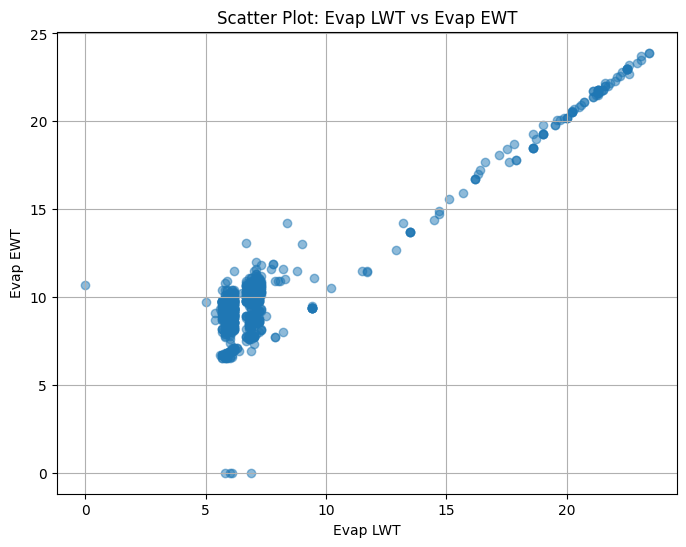

Koefisien Korelasi Pearson antara Evap LWT dan Evap EWT: 0.93
Hubungan kuat (positif) antara kedua variabel.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Menampilkan scatter plot "Evap LWT" vs "Evap EWT"
plt.figure(figsize=(8, 6))
plt.scatter(data['Evap LWT'], data['Evap EWT'], alpha=0.5)
plt.title('Scatter Plot: Evap LWT vs Evap EWT')
plt.xlabel('Evap LWT')
plt.ylabel('Evap EWT')
plt.grid(True)
plt.show()

# Menghitung koefisien korelasi Pearson
correlation = data['Evap LWT'].corr(data['Evap EWT'])

print(f'Koefisien Korelasi Pearson antara Evap LWT dan Evap EWT: {correlation:.2f}')

# Analisis kekuatan hubungan
if correlation > 0.7:
    print('Hubungan kuat (positif) antara kedua variabel.')
elif correlation > 0.3:
    print('Hubungan sedang (positif) antara kedua variabel.')
elif correlation < -0.7:
    print('Hubungan kuat (negatif) antara kedua variabel.')
elif correlation < -0.3:
    print('Hubungan sedang (negatif) antara kedua variabel.')
else:
    print('Hubungan lemah antara kedua variabel.')


## 4. Non Linear Relationship

## LOWESS (Locally Weighted Scatterplot Smoothing)

ChatGPT Prompt:

Berikan code untuk melakukan Locally Weighted Scatterplot Smoothing pada data chiller yang sebelumnya telah di load untuk kolom "Evap LWT" dan "Evap EWT"

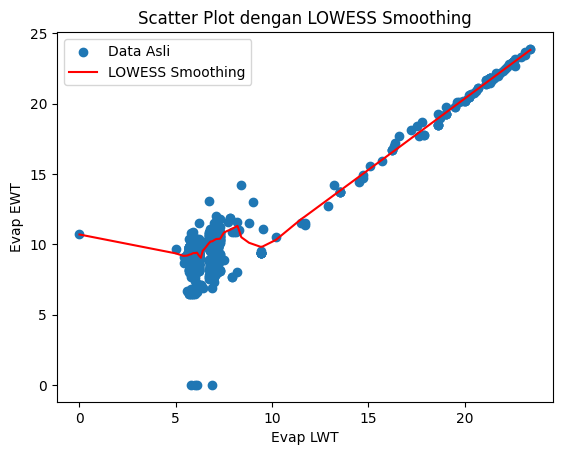

In [24]:
# Memilih kolom "Evap LWT" dan "Evap EWT"
x = data['Evap LWT']
y = data['Evap EWT']

# Melakukan LOWESS smoothing
lowess = sm.nonparametric.lowess(y, x, frac=0.2)  # Anda dapat menyesuaikan nilai frac sesuai kebutuhan

# Mendapatkan hasil smoothing
lowess_x, lowess_y = lowess.T

# Membuat scatter plot data asli
plt.scatter(x, y, label='Data Asli')

# Membuat plot hasil LOWESS smoothing
plt.plot(lowess_x, lowess_y, 'r-', label='LOWESS Smoothing')

plt.xlabel('Evap LWT')
plt.ylabel('Evap EWT')
plt.title('Scatter Plot dengan LOWESS Smoothing')
plt.legend()
plt.show()

Dalam grafik diatas, LOESS digunakan untuk menghaluskan scatterplot antara variabel Y dan variabel X. Grafik asli menunjukkan bahwa ada beberapa titik data yang menyimpang dari tren umum. LOESS digunakan untuk mengurangi pengaruh titik data yang menyimpang ini dan menghasilkan garis tren yang lebih halus.